# Table of Contents
* [VIND dataset](#VIND-dataset)
	* [Basic stats](#Basic-stats)
		* [Test/Train split- video numbers](#Test/Train-split--video-numbers)
		* [fine-grained action types](#fine-grained-action-types)
		* [Establishing non-uniqueness of paths and movie names](#Establishing-non-uniqueness-of-paths-and-movie-names)
		* [Coarse category types](#Coarse-category-types)
		* [Comparing category distributions between test/train](#Comparing-category-distributions-between-test/train)
	* [Looking at movie length distribution of combined test/train](#Looking-at-movie-length-distribution-of-combined-test/train)
	* [Sorting replacment videos](#Sorting-replacment-videos)
	* [second pass over selected categories](#second-pass-over-selected-categories)
		* [In the future, should set max capture length](#In-the-future,-should-set-max-capture-length)
	* [Confirmation code output test](#Confirmation-code-output-test)
	* [identicle frames](#identicle-frames)
	* [file renaming example](#file-renaming-example)
	* [similar image comparison](#similar-image-comparison)


# VIND dataset

In [1]:
%%capture
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import operator
import math
from collections import Counter, defaultdict
import glob
import os

In [2]:
%%capture
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pylab as plt
#%matplotlib notebook
%matplotlib inline
%load_ext base16_mplrc
%base16_mplrc light default
plt.rcParams['figure.figsize'] = (16.0, 10.0)

go over rugby to screen pov changes

ask about first person pov
low frame rate train lifting_weights 130_0

subset image/video

slow motion/ repeated frames 
data/prediction_videos_final_train/falling-cliff-jumping/56_0
diving/cliff jumping
data/prediction_videos_final_train/falling-cliff-jumping/100_2

## Basic stats

### Test/Train split- video numbers

In [3]:
!ls data/prediction_videos_final_train/* | wc -l
!ls data/prediction_videos_final_test/* | wc -l

    4625
    2477


In [2]:
ntot = 6887

In [4]:
ntot*0.05

344.35

In [6]:
(ntot-6018)*15/100

130.35

In [7]:
1420 * 5 /3600

1.9722222222222223

### fine-grained action types

In [8]:
test_cats = !ls data/prediction_videos_final_test
test_cats = set(test_cats)
test_cats

{'bouncing-basketball-dribble',
 'bouncing-tennis-serve',
 'bouncing-volleyball',
 'falling-cliff-jumping',
 'falling-diving',
 'falling-diving2',
 'falling-tennis-serve',
 'ind_find_dupes.sh',
 'kicking-futsal',
 'kicking-golf-swing',
 'kicking-soccer-freekick',
 'kicking-soccer-penalty',
 'lifting-bench-press',
 'lifting-lift-box',
 'lifting-weightlifting',
 'longthrowing-boomerang',
 'longthrowing-disk',
 'longthrowing-frisbee',
 'passing-basketball',
 'passing-handball',
 'passing-rugby',
 'pitching-baseball',
 'pitching-tennis-smash',
 'pitching-volleyball-spike',
 'pushing-car',
 'pushing-lawn-mower',
 'pushing-stroller',
 'rolling-billiard',
 'rolling-bowling',
 'rolling-soccer-pass',
 'sliding-skateboard',
 'sliding-skateboard2',
 'sliding-skateboard3',
 'sliding-skating',
 'sliding-ski',
 'sliding-ski2',
 'sliding-slide',
 'sliding-slide2',
 'sliding-snowboard',
 'stable-e',
 'stable-f',
 'stable-g',
 'stable-h',
 'swinging-boat',
 'swinging-gymnastic',
 'swinging-gymnastic2',

In [9]:
train_cats = !ls data/prediction_videos_final_train
train_cats = set(train_cats)
train_cats

{'bouncing-basketball-dribble',
 'bouncing-tennis-serve',
 'bouncing-volleyball',
 'falling-cliff-jumping',
 'falling-diving',
 'falling-diving2',
 'falling-tennis-serve',
 'kicking-basketball',
 'kicking-boomerang',
 'kicking-disk',
 'kicking-football',
 'kicking-frisbee',
 'kicking-futsal',
 'kicking-golf-swing',
 'kicking-soccer-freekick',
 'kicking-soccer-penalty',
 'kicking-volleyball',
 'lifting-bench-press',
 'lifting-lift-box',
 'lifting-weightlifting',
 'passing-basketball',
 'passing-handball',
 'passing-rugby',
 'pitching-baseball',
 'pitching-tennis-smash',
 'pitching-volleyball-spike',
 'pushing-car',
 'pushing-lawn-mower',
 'pushing-stroller',
 'rolling-billiard',
 'rolling-bowling',
 'rolling-soccer-pass',
 'sliding-skateboard',
 'sliding-skateboard2',
 'sliding-skateboard3',
 'sliding-skating',
 'sliding-ski',
 'sliding-ski2',
 'sliding-slide',
 'sliding-slide2',
 'sliding-snowboard',
 'stable-a',
 'stable-b',
 'stable-c',
 'stable-d',
 'swinging-boat',
 'swinging-gymna

In [10]:
test_cats.difference(train_cats)

{'ind_find_dupes.sh',
 'longthrowing-boomerang',
 'longthrowing-disk',
 'longthrowing-frisbee',
 'stable-e',
 'stable-f',
 'stable-g',
 'stable-h',
 'throwing-basketball',
 'throwing-football',
 'throwing-volleyball'}

Some categories don't appear in both test and train

### Establishing non-uniqueness of paths and movie names

In [11]:
test_movie_names = []
for movie in glob.glob('./data/prediction_videos_final_test/*/*'):
    test_movie_names.append(movie.split('/')[4])

In [12]:
test_movie_names[:5]

['10_0', '10_1', '10_2', '10_3', '10_4']

In [13]:
print(len(test_movie_names))
print(len(set(test_movie_names)))

2368
769


Movie names are not unique

In [14]:
[m for m in test_movie_names if m == '00000']

['00000', '00000', '00000', '00000']

These 'stable' images can be ignored

In [15]:
train_movie_names = []
for movie in glob.glob('./data/prediction_videos_final_train/*/*'):
    train_movie_names.append(movie.split('/')[4])

In [16]:
print(len(train_movie_names))
print(len(set(train_movie_names)))
print(len(test_movie_names) + len(train_movie_names))
print()
print(len(set(train_movie_names).intersection(set(test_movie_names))))
print(len(set(train_movie_names).difference(set(test_movie_names))))

4518
1360
6886

461
899


In [17]:
full_train_movie_names = []
for movie in glob.glob('./data/prediction_videos_final_train/*/*'):
    full_train_movie_names.append('/'.join(movie.split('/')[3:5]))

full_test_movie_names = []
for movie in glob.glob('./data/prediction_videos_final_test/*/*'):
    full_test_movie_names.append('/'.join(movie.split('/')[3:5]))

In [18]:
print(len(full_train_movie_names))
print(len(set(full_train_movie_names)))
print()
print(len(full_test_movie_names))
print(len(set(full_test_movie_names)))

4518
4518

2368
2368


In [19]:
print(len(set(full_train_movie_names).intersection(set(full_train_movie_names))))
print(len(set(train_movie_names)))

4518
1360


### Coarse category types

In [20]:
train_cat_occurence = [cat.split('/')[0] for cat in full_train_movie_names]

train_cat_counts = Counter(train_cat_occurence)
train_cat_counts.most_common()[:10]

[('lifting-bench-press', 329),
 ('pushing-stroller', 233),
 ('bouncing-basketball-dribble', 208),
 ('sliding-snowboard', 197),
 ('kicking-boomerang', 177),
 ('swinging-swing', 166),
 ('rolling-billiard', 164),
 ('throwup-soccer-juggling', 162),
 ('kicking-soccer-freekick', 156),
 ('falling-cliff-jumping', 155)]

In [21]:
test_cat_occurence = [cat.split('/')[0] for cat in full_test_movie_names]

test_cat_counts = Counter(test_cat_occurence)
test_cat_counts.most_common()[:10]

[('lifting-bench-press', 179),
 ('pushing-stroller', 119),
 ('bouncing-basketball-dribble', 115),
 ('sliding-snowboard', 99),
 ('swinging-swing', 85),
 ('falling-cliff-jumping', 83),
 ('throwup-soccer-juggling', 83),
 ('sliding-ski2', 82),
 ('longthrowing-boomerang', 78),
 ('pushing-lawn-mower', 77)]

In [22]:
train_meta_cat_occurence = [cat.split('/')[0].split('-', maxsplit=1)[0] for cat in full_train_movie_names]

train_meta_cat_counts = Counter(train_meta_cat_occurence)
train_meta_cat_counts.most_common()

[('kicking', 1002),
 ('sliding', 572),
 ('pushing', 467),
 ('swinging', 436),
 ('lifting', 409),
 ('passing', 350),
 ('rolling', 276),
 ('bouncing', 276),
 ('falling', 250),
 ('stable', 212),
 ('throwup', 209),
 ('pitching', 59)]

In [23]:
test_meta_cat_occurence = [cat.split('/')[0].split('-', maxsplit=1)[0] for cat in full_test_movie_names]

test_meta_cat_counts = Counter(test_meta_cat_occurence)
sorted_test = test_meta_cat_counts.most_common()

### Comparing category distributions between test/train

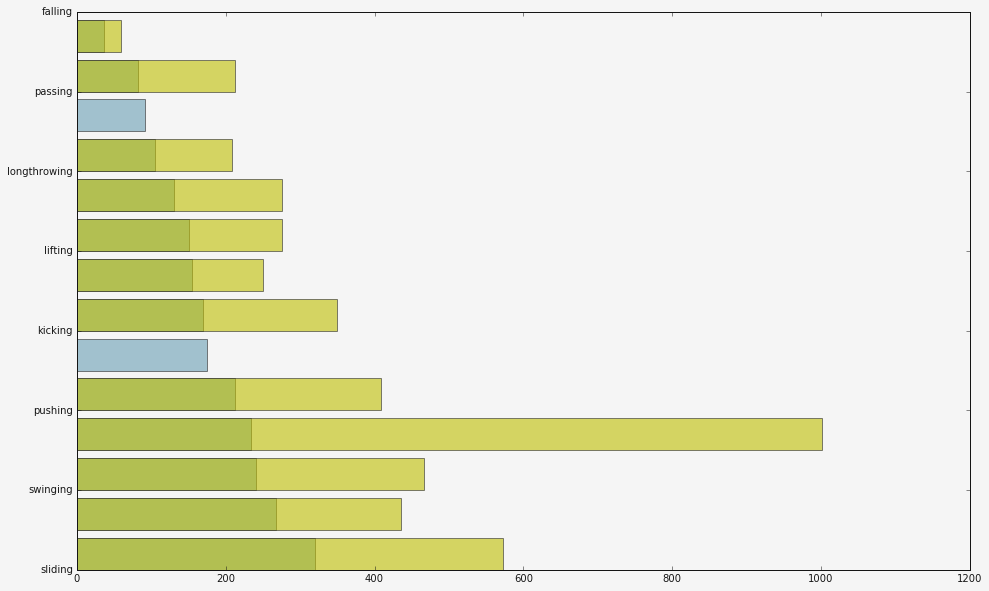

In [24]:
bot_test = [cat[0] for cat in sorted_test]
wid_test = [cat[1] for cat in sorted_test]

bot_train = bot_test 
wid_train = [train_meta_cat_counts[cat[0]] for cat in sorted_test]

fig, ax = plt.subplots()
ax.barh(np.arange(len(wid_test)),wid_test, alpha = 0.6)
ax.barh(np.arange(len(wid_test)),wid_train, alpha = 0.6, color='y')

_ = ax.set_yticklabels(bot_test)

In [25]:
all_movies = []
for movie in glob.glob('./data/prediction_videos_final_train/*/*'):
    all_movies.append('/'.join(movie.split('/')[2:5]))

full_test_movie = []
for movie in glob.glob('./data/prediction_videos_final_test/*/*'):
    all_movies.append('/'.join(movie.split('/')[2:5]))

In [26]:
all_movies[:5]

['prediction_videos_final_train/bouncing-basketball-dribble/106_0',
 'prediction_videos_final_train/bouncing-basketball-dribble/106_1',
 'prediction_videos_final_train/bouncing-basketball-dribble/106_2',
 'prediction_videos_final_train/bouncing-basketball-dribble/106_3',
 'prediction_videos_final_train/bouncing-basketball-dribble/106_4']

## Looking at movie length distribution of combined test/train

In [27]:
movie_lengths = {}
for path in all_movies:
    files = os.listdir('./data/'+path)
    movie_lengths[''.join(path.split('_', maxsplit=3)[3:])] = len(files)

sorted_movies = sorted(movie_lengths.items(), key=operator.itemgetter(1))

In [28]:
sorted_movies[293:305]

[('train/stable-d/00093', 1),
 ('train/rolling-billiard/193_1', 3),
 ('train/lifting-bench-press/130_7', 3),
 ('train/rolling-billiard/193_0', 3),
 ('train/rolling-billiard/176_1', 3),
 ('train/passing-rugby/96_3', 3),
 ('train/passing-rugby/95_3', 3),
 ('test/rolling-billiard/127_1', 5),
 ('train/rolling-billiard/37_1', 5),
 ('train/rolling-billiard/65_4', 5),
 ('train/rolling-billiard/65_7', 5),
 ('train/rolling-billiard/65_2', 5)]

In [29]:
386/24

16.083333333333332

In [30]:
sorted_movies[-20:]

[('train/pushing-stroller/70_5', 386),
 ('test/pushing-lawn-mower/61_0', 396),
 ('train/pushing-lawn-mower/48_6', 416),
 ('train/kicking-futsal/84_4', 435),
 ('test/pushing-stroller/3_5', 447),
 ('train/pushing-lawn-mower/14_7', 456),
 ('train/throwup-table-tennis-serve/172_0', 466),
 ('train/passing-rugby/168_4', 471),
 ('train/pushing-lawn-mower/156_4', 511),
 ('train/sliding-slide2/52_1', 522),
 ('test/sliding-skateboard2/61_6', 607),
 ('train/kicking-futsal/83_0', 625),
 ('train/pushing-car/161_0', 659),
 ('train/sliding-skateboard/194_2', 704),
 ('test/pushing-lawn-mower/61_1', 711),
 ('train/pushing-car/123_0', 786),
 ('test/pushing-lawn-mower/20_6', 861),
 ('train/pushing-car/16_0', 1126),
 ('train/falling-diving2/101_2', 2230),
 ('train/passing-handball/50_7', 5366)]

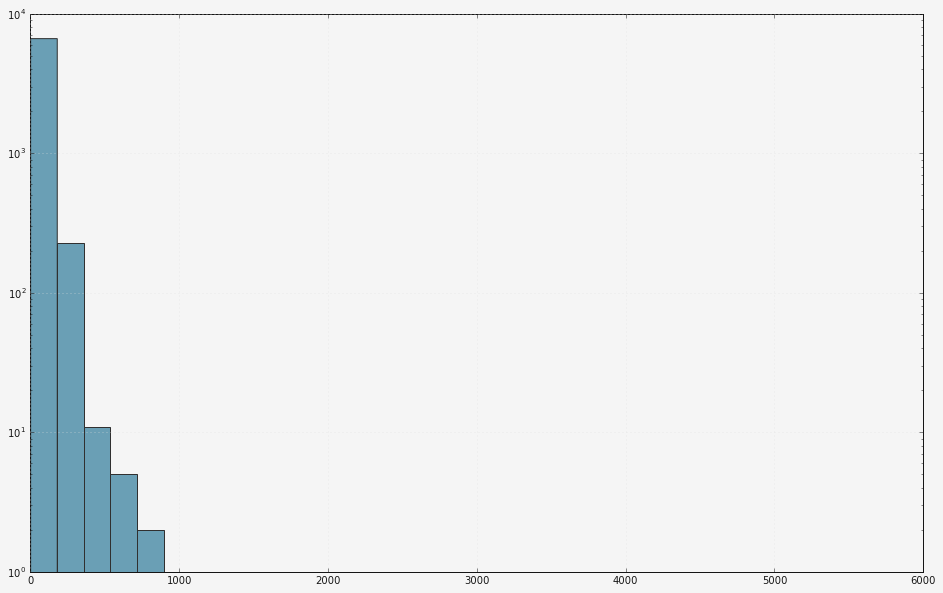

In [31]:
length_series = pd.Series(list(movie_lengths.values()))
_ = length_series.hist(bins = 30, log = True)

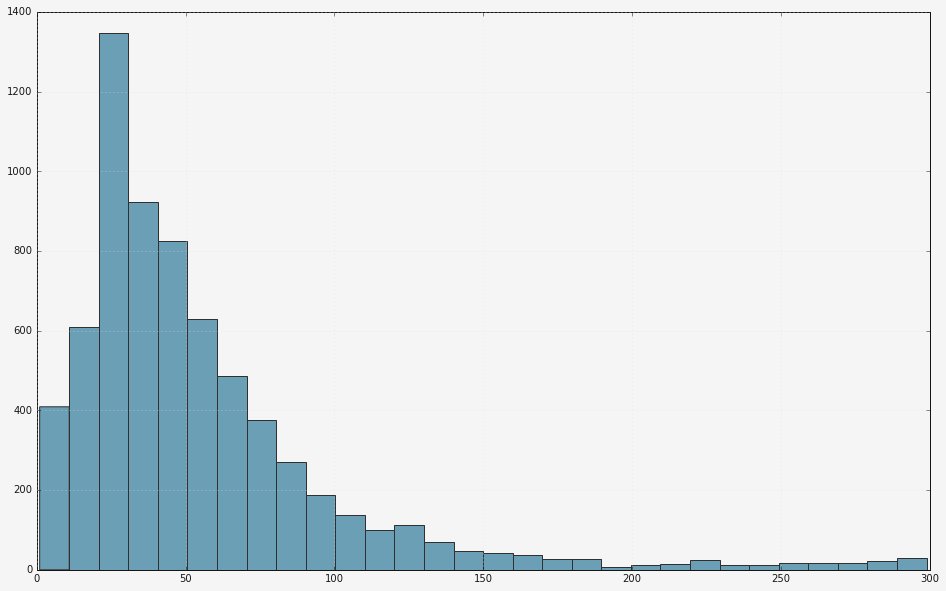

In [32]:
length_series = pd.Series([val for val in movie_lengths.values() if val < 300])
_ = length_series.hist(bins = 30)

In [33]:
len_array = np.array([int(sm[1]) for sm in sorted_movies])

len_array_f = len_array[len_array > 1]
len_array_f = len_array_f[len_array_f < 300]
l_full, l_fill =len(len_array), len(len_array_f)
print(l_full, l_fill)
ldiff = l_full- l_fill
print(ldiff)
print(ldiff/l_full)

6886 6552
334
0.04850421144350857


Only 5% of the videos have more than 300 frames, or 12s

In [34]:
df = pd.DataFrame.from_records(sorted_movies)

!!! Remove movies that have been removed if this is re-written !!!

In [35]:
df[0].to_csv('./movies_sorted_by_length.csv', index = False)

## Sorting replacment videos

In [36]:
replacement_movie_names = []
for movie in glob.glob('./data/prediction_videos_3_categories/*/*'):
    replacement_movie_names.append('/'.join(movie.split('/')[3:5]))

In [37]:
bowling_videos = replacement_movie_names[0:129]

In [38]:
replacement_movie_lengths = {}
for path in replacement_movie_names:
    files = os.listdir('./data/prediction_videos_3_categories/'+path)
    replacement_movie_lengths[path] = len(files)

In [39]:
sorted_replacement_movies = sorted(replacement_movie_lengths.items(), key=operator.itemgetter(1))
sdf = pd.DataFrame.from_records(sorted_replacement_movies)
sdf[0].to_csv('./bowling_movies_sorted_by_length.csv', index = False)

In [40]:
bowling_movie_lengths = {}
for path in bowling_videos:
    files = os.listdir('./data/prediction_videos_3_categories/'+path)
    bowling_movie_lengths[path] = len(files)

sorted_bowling_videos = sorted(bowling_movie_lengths.items(), key=operator.itemgetter(1))
sdf = pd.DataFrame.from_records(sorted_bowling_videos)
sdf[0].to_csv('./bowling_movies_sorted_by_length.csv', index = False)

In [41]:
len(sorted_replacement_movies)

399

## second pass over selected categories

In [42]:
all_movie_2s = []
for movie_2 in glob.glob('./data/prediction_videos_final_train/*billiard*/*'):
    all_movie_2s.append('/'.join(movie_2.split('/')[2:5]))

full_test_movie_2 = []
for movie_2 in glob.glob('./data/prediction_videos_final_test/*billiard*/*'):
    all_movie_2s.append('/'.join(movie_2.split('/')[2:5]))
    
movie_2_lengths = {}
for path in all_movie_2s:
    files = os.listdir('./data/'+path)
    movie_2_lengths[''.join(path.split('_', maxsplit=3)[3:])] = len(files)

sorted_movie_2s = sorted(movie_2_lengths.items(), key=operator.itemgetter(1))

In [43]:
spdf = pd.DataFrame.from_records(sorted_movie_2s)
spdf[0].to_csv('./second_pass_billiard_test.csv', index = False)

In [49]:
# %page sorted_movie_2s

In [45]:
len(sorted_movie_2s)

228

### In the future, should set max capture length

## Confirmation code output test

In [58]:
import ast

In [47]:
frame_results = []
with open('ex_log.txt', 'r') as f:
    frame_results = f.readlines()

In [48]:
spt = frame_results[0].split(', ', maxsplit =2)

flist = ast.literal_eval(spt[2])

NameError: name 'frame_results' is not defined

## identicle frames

passing-rugby, train  95_3 96_3 are identicle


data/prediction_videos_final_test/passing-rugby/118_3


data/prediction_videos_final_train/passing-rugby/117_3

## file renaming example

In [50]:
import os

In [ ]:
frames = [['00000', '00020'], ['00040', '00050']]

In [ ]:
old_path = './79_2/'
new_path = './test/'
fext = '.png'
os.mkdir(new_path)
for span in frames:
    for frame in range(int(span[0]), int(span[1])+1):
        oldf = old_path+str(frame).zfill(5) + fext
        newf = new_path+str(frame).zfill(5) + fext
        os.rename(oldf, newf)

## similar image comparison

In [51]:
from skimage.measure import compare_ssim as ssim
from skimage.measure import compare_mse as mse
import cv2
from IPython.core.display import display

In [52]:
image1 = cv2.imread('./similar_ex/53_6/00039.png')
image2 = cv2.imread('./similar_ex/53_7/00036.png')

In [53]:
s = ssim(image1, image2, multichannel=True)
s

/usr/local/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/usr/local/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/usr/local/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


0.9876878400641943

In [54]:
s = mse(image1, image2)
s

2.2284777777777776

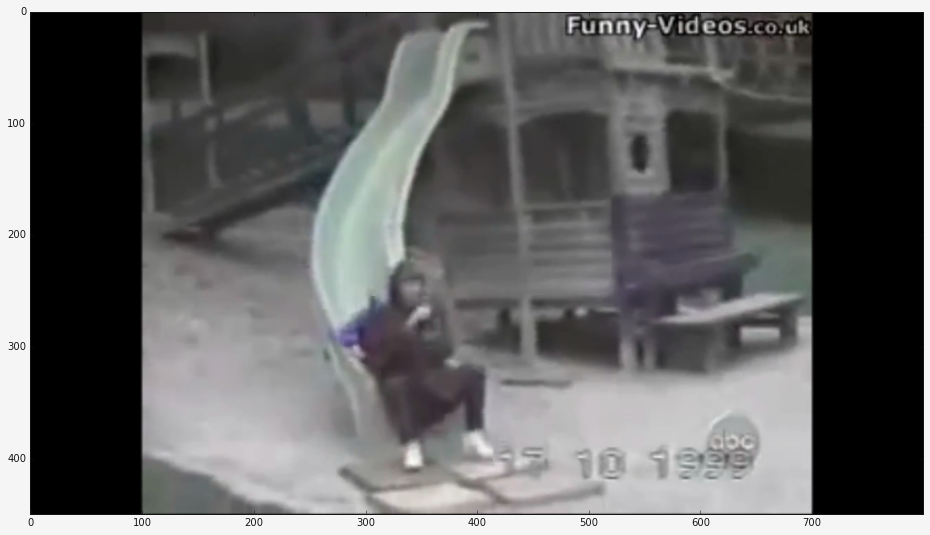

In [55]:
_ = plt.imshow(image1)

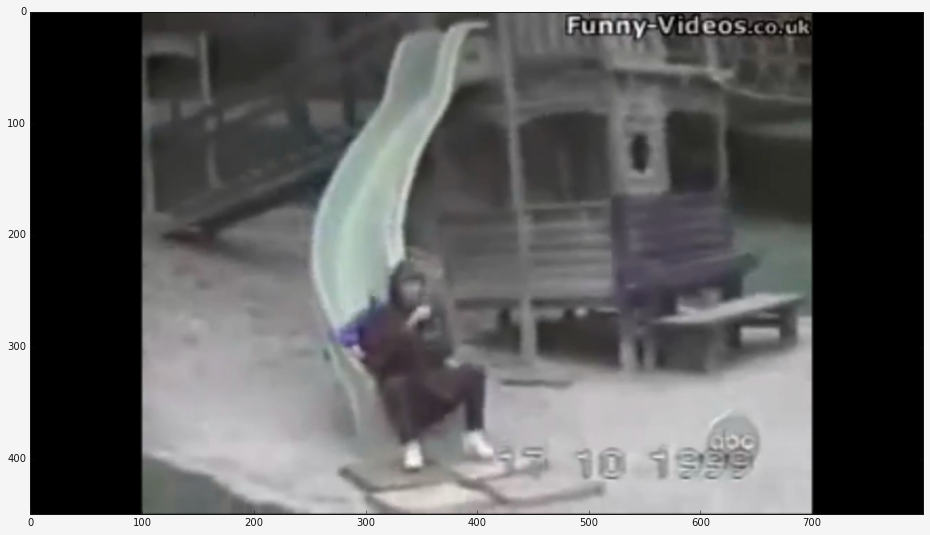

In [56]:
_ = plt.imshow(image2)

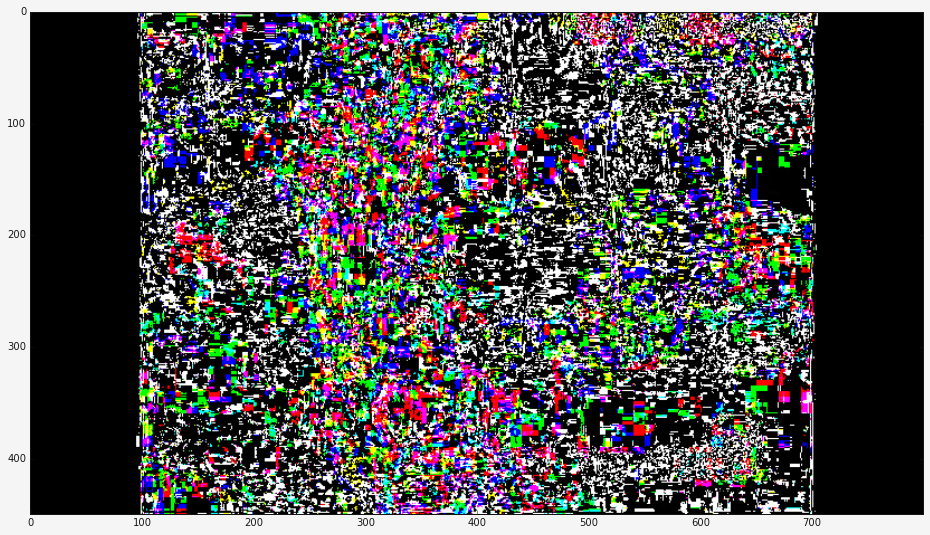

In [57]:
_ = plt.imshow(image1 - image2)